In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pymongo
client = pymongo.MongoClient("mongodb+srv://Prikshit7766:<password>@cluster0.bb7u7jb.mongodb.net/?retryWrites=true&w=majority")
db = client.test
database=client["electric_power_consumption"]

In [7]:
#select database
db = client["electric_power_consumption"]
#select the collection within the database
train = db.data_training
#convert entire collection to Pandas dataframe
train = pd.DataFrame(list(train.find()))

In [8]:

#select the collection within the database
test = db.data_testing
#convert entire collection to Pandas dataframe
test= pd.DataFrame(list(test.find()))

In [9]:
train.head()

,_id,Global_reactive_power,Voltage,year,month,day,power_consumption
0,637276fa5b7f1beda9e9bc46,0.000,241.91,2008,9,7,2.966667
1,637276fa5b7f1beda9e9bc47,0.188,241.35,2008,5,10,2.900000
2,637276fa5b7f1beda9e9bc48,0.106,240.93,2010,8,12,1.900000
3,637276fa5b7f1beda9e9bc49,0.136,240.38,2008,7,29,7.466667
4,637276fa5b7f1beda9e9bc4a,0.184,240.56,2009,12,11,36.966667


In [10]:
test.head()

,_id,Global_reactive_power,Voltage,year,month,day,power_consumption
0,637277045b7f1beda9e9f2f6,0.114,242.59,2010,8,3,1.900000
1,637277045b7f1beda9e9f2f7,0.118,238.66,2006,12,24,12.000000
2,637277045b7f1beda9e9f2f8,0.204,233.14,2007,7,19,3.733333
3,637277045b7f1beda9e9f2f9,0.232,240.92,2009,6,21,4.800000
4,637277045b7f1beda9e9f2fa,0.190,238.92,2007,9,26,6.400000


In [11]:
train=train.drop("_id",axis=1)
test=test.drop("_id",axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_reactive_power  14000 non-null  float64
 1   Voltage                14000 non-null  float64
 2   year                   14000 non-null  int64  
 3   month                  14000 non-null  int64  
 4   day                    14000 non-null  int64  
 5   power_consumption      14000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 656.4 KB


In [13]:
train.isna().sum()

Global_reactive_power    0
Voltage                  0
year                     0
month                    0
day                      0
power_consumption        0
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_reactive_power  6000 non-null   float64
 1   Voltage                6000 non-null   float64
 2   year                   6000 non-null   int64  
 3   month                  6000 non-null   int64  
 4   day                    6000 non-null   int64  
 5   power_consumption      6000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 281.4 KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_reactive_power  6000 non-null   float64
 1   Voltage                6000 non-null   float64
 2   year                   6000 non-null   int64  
 3   month                  6000 non-null   int64  
 4   day                    6000 non-null   int64  
 5   power_consumption      6000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 281.4 KB


In [16]:
# we are good to go

In [17]:
x_train=train.drop("power_consumption",axis=1)
y_train=train["power_consumption"]
x_test=test.drop("power_consumption",axis=1)
y_test=test["power_consumption"]

## standardize the datasets
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(x_train)
s_x_test=scaler.transform(x_test)

model Training

### **linear regression**

In [19]:
# this is multiple linear regression Problem
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
# training the training data
regression.fit(s_x_train,y_train)

LinearRegression()

In [20]:
# print the cofficient and the intercept
print(regression.coef_)
# toal cofficient = number of features 

[ 2.41235297 -4.50177028 -2.50624617  0.98271462  0.98872374]


In [21]:
print(regression.intercept_)

13.083848809523834


In [22]:
# prediction for test data
y_pred1=regression.predict(s_x_test)

In [23]:
# residuals
residuals=y_test-y_pred1

Text(0, 0.5, 'Test pred data')

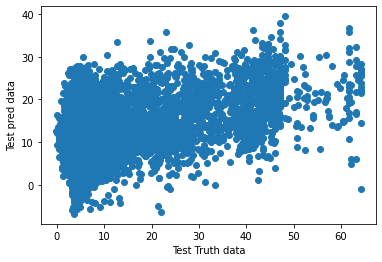

In [24]:
plt.scatter(y_test,y_pred1)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

w.r.t your truth point and predicted point if you are getting some linear replationship then your model is good

In [25]:
# residuals
residuals=y_test-y_pred1

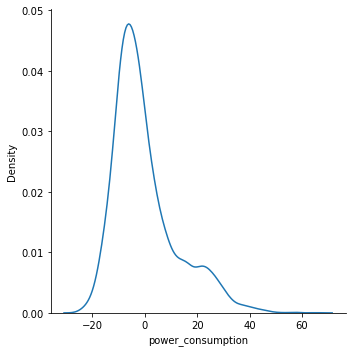

In [26]:
sns.displot(residuals,kind="kde")

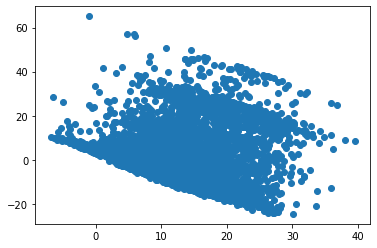

In [27]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred1,residuals)

**performance matrix**

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred1))
print("(mean_squared_error",mean_squared_error(y_test,y_pred1))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred1)))

mean_absolute_error 9.310696846418214
(mean_squared_error 148.01180106206274
root mean squared error 12.166010071591375


mean_squared_error  is shooting up , as mean_squared_error is very sensitive to outliers

**r squared and adjusted R squared**

In [29]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)
print(score)

0.204790930041854


In [30]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.20412759247932633

 ### **Ridge regression**

In [31]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(s_x_train,y_train)

Ridge()

In [32]:
y_pred2 = ridge.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

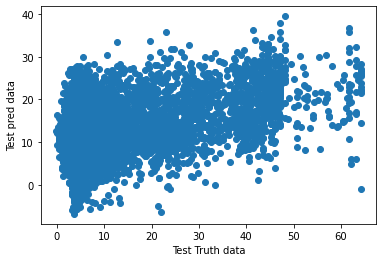

In [33]:
plt.scatter(y_test,y_pred2)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

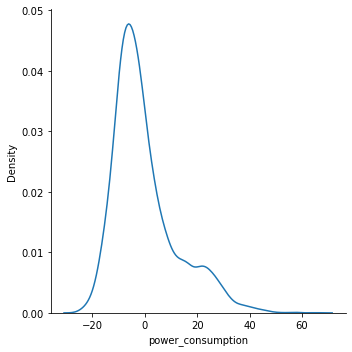

In [34]:
# residuals
residuals=y_test-y_pred2
sns.displot(residuals,kind="kde")

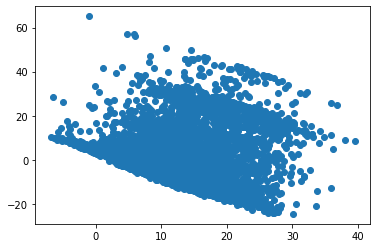

In [35]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred2,residuals)

**performance matrix**

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred2))
print("(mean_squared_error",mean_squared_error(y_test,y_pred2))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred2)))

mean_absolute_error 9.310682108274783
(mean_squared_error 148.01153334846046
root mean squared error 12.165999069063767


**r squared and adjusted R squared**

In [40]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print(score)

0.20479236836152281


In [41]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.20412903199879473

### **Lasso Regression**

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(s_x_train,y_train)
y_pred3 = lasso.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

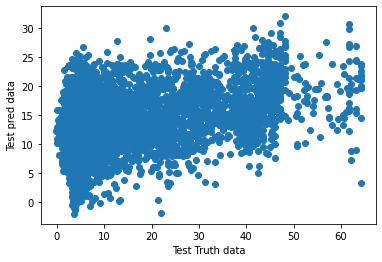

In [43]:
plt.scatter(y_test,y_pred3)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

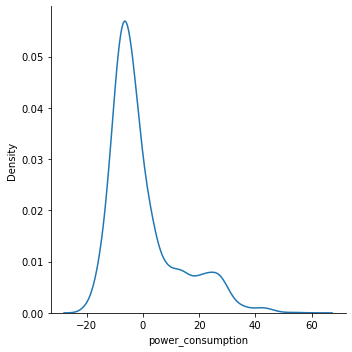

In [44]:
# residuals
residuals=y_test-y_pred3
sns.displot(residuals,kind="kde")

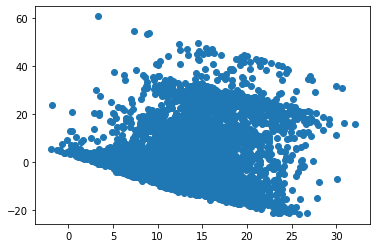

In [45]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred3,residuals)

**performance matrix**

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred3))
print("(mean_squared_error",mean_squared_error(y_test,y_pred3))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred3)))

mean_absolute_error 9.375265563537349
(mean_squared_error 150.54654251004982
root mean squared error 12.269740930844865


**r squared and adjusted R squared**

In [47]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred3)
print(score)

0.19117276328099564


In [48]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.1904980658863351

**SVR**

In [49]:
from sklearn.svm import SVR,LinearSVR

In [50]:
base_model=SVR()

In [51]:
base_model.fit(s_x_train,y_train)
y_pred4 = base_model.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

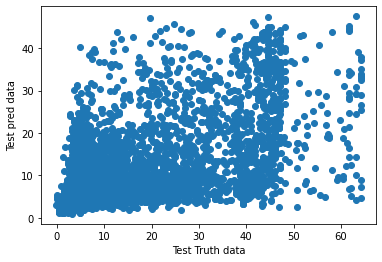

In [52]:
plt.scatter(y_test,y_pred4)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

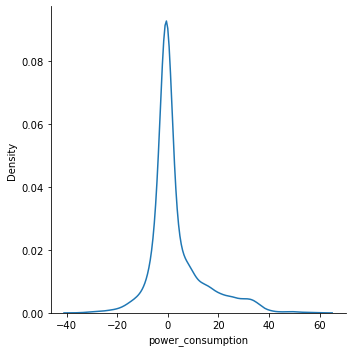

In [53]:
# residuals
residuals=y_test-y_pred4
sns.displot(residuals,kind="kde")

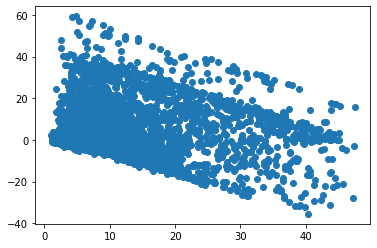

In [54]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred4,residuals)

**performance matrix**

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred4))
print("(mean_squared_error",mean_squared_error(y_test,y_pred4))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred4)))

mean_absolute_error 6.690702984124657
(mean_squared_error 123.67001415655012
root mean squared error 11.120702053222635


**r squared and adjusted R squared**

In [56]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred4)
print(score)

0.33556975704994885


In [59]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3350155109347086

In [60]:
# svr is performing as compare to other models so we are going to do grid search cv for that

gridSearchCV for svr

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# parameters
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1],
'kernel': ['linear', 'rbf', 'poly'],
'gamma' : ['scale', 'auto'], 'degree': [2,3,4],
'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [63]:
svr = SVR()

In [64]:
grid_model = GridSearchCV(svr, param_grid)

In [65]:
grid_model.fit(s_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [66]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [67]:
y_pred5 = grid_model.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

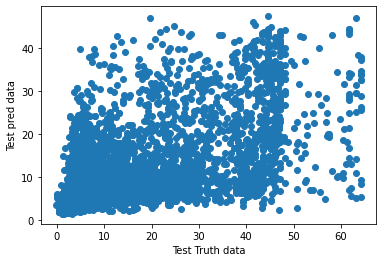

In [68]:
plt.scatter(y_test,y_pred5)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

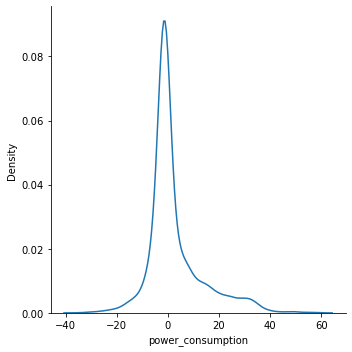

In [69]:
# residuals
residuals=y_test-y_pred5
sns.displot(residuals,kind="kde")

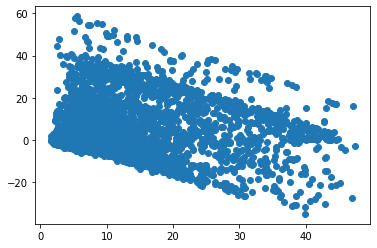

In [70]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred5,residuals)

**performance matrix**

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred5))
print("mean_squared_error",mean_squared_error(y_test,y_pred5))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred5)))

mean_absolute_error 6.787446694643523
mean_squared_error 120.22792894427774
root mean squared error 10.964849700031357


**r squared and adjusted R squared**

In [72]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred5)
print(score)

0.35406272423720786


In [73]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3535239043541891